In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [3]:
#Load the data
df=pd.read_csv('bank.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [7]:
#Encode Categorical variables
df['job']=df['job'].astype('category').cat.codes
df['marital']=df['marital'].astype('category').cat.codes
df['education']=df['education'].astype('category').cat.codes
df['default']=df['default'].astype('category').cat.codes
df['housing']=df['housing'].astype('category').cat.codes
df['loan']=df['loan'].astype('category').cat.codes
df['contact']=df['contact'].astype('category').cat.codes
df['month']=df['month'].astype('category').cat.codes
df['poutcome']=df['poutcome'].astype('category').cat.codes
df['deposit']=df['deposit'].astype('category').cat.codes

In [8]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3,0
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0,0


In [9]:
#Initialise feature and target variable
X=df.drop(columns=['deposit'])
X

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,3
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,3
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,3
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,3
11160,43,9,1,1,0,0,0,1,0,8,8,9,2,172,5,0


In [10]:
y=df['deposit']
y

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int8

In [11]:
#Split into train and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
model=DecisionTreeClassifier(random_state=42)

In [13]:
#Train the model
model.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [14]:
#Make predictions
y_pred = model.predict(X_test)

In [15]:
print(y_pred)

[0 1 1 ... 0 1 0]


In [16]:
tf=pd.DataFrame({
    'age':[41],
    'job':['admin.'],
    'marital':['married'],
    'education':['secondary'],
    'default':['no'],
    'balance':[55],
    'housing':['yes'],
    'loan':['no'],
    'contact':['unknown'],
    'day':[8],
    'month':['may'],
    'duration':[1120],
    'campaign':[2],
    'pdays':[-1],
    'previous':[0],
    'poutcome':['unknown']
})

In [17]:
tf['job']=tf['job'].astype('category').cat.codes
tf['marital']=tf['marital'].astype('category').cat.codes
tf['education']=tf['education'].astype('category').cat.codes
tf['default']=tf['default'].astype('category').cat.codes
tf['housing']=tf['housing'].astype('category').cat.codes
tf['loan']=tf['loan'].astype('category').cat.codes
tf['contact']=tf['contact'].astype('category').cat.codes
tf['month']=tf['month'].astype('category').cat.codes
tf['poutcome']=tf['poutcome'].astype('category').cat.codes

In [18]:
prediction=model.predict(tf)

In [19]:
print('the outcome is: ',prediction)

the outcome is:  [1]


In [20]:
# Creating the DataFrame with the new variable name
new_data = pd.DataFrame({
    'age': [40],
    'job': ['management'],
    'marital': ['single'],
    'education': ['tertiary'],
    'default': ['no'],
    'balance': [0],
    'housing': ['no'],
    'loan': ['no'],
    'contact': ['cellular'],
    'day': [26],
    'month': ['aug'],
    'duration': [58],
    'campaign': [7],
    'pdays': [-1],
    'previous': [0],
    'poutcome': ['unknown']
})

In [21]:
new_data['job'] = new_data['job'].astype('category').cat.codes
new_data['marital'] = new_data['marital'].astype('category').cat.codes
new_data['education'] = new_data['education'].astype('category').cat.codes
new_data['default'] = new_data['default'].astype('category').cat.codes
new_data['housing'] = new_data['housing'].astype('category').cat.codes
new_data['loan'] = new_data['loan'].astype('category').cat.codes
new_data['contact'] = new_data['contact'].astype('category').cat.codes
new_data['month'] = new_data['month'].astype('category').cat.codes
new_data['poutcome'] = new_data['poutcome'].astype('category').cat.codes

In [22]:
prediction1=model.predict(new_data)

In [23]:
print('The outcome is: ',prediction1)

The outcome is:  [0]


In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.7630989699955217


In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.78      0.78      1166
           1       0.76      0.74      0.75      1067

    accuracy                           0.76      2233
   macro avg       0.76      0.76      0.76      2233
weighted avg       0.76      0.76      0.76      2233



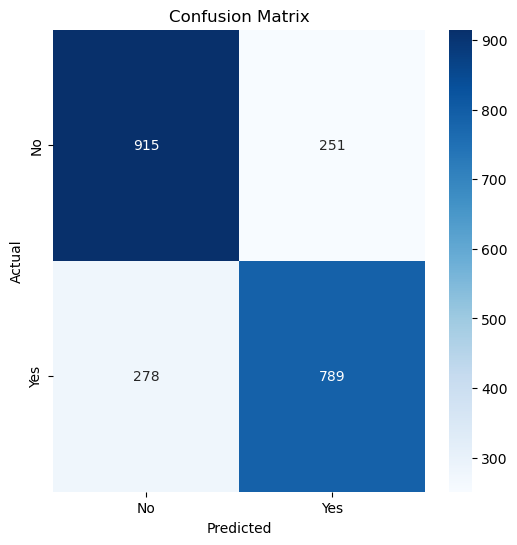

In [26]:
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()